Perceptron
Let us try to understand the Perceptron algorithm using the following data as a motivating example.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

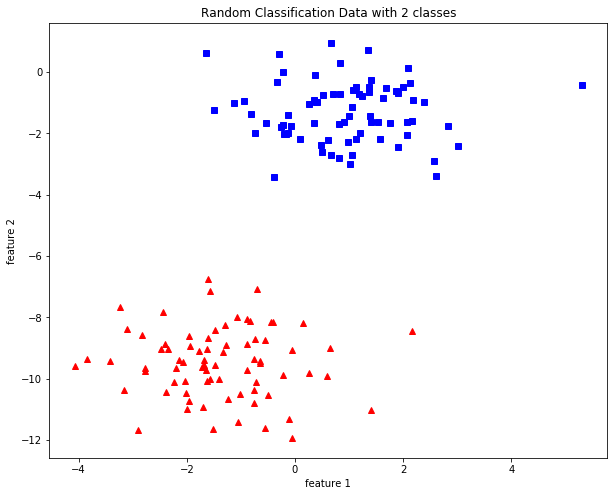

In [2]:
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

- There are two classes, red and green, and we want to separate them by drawing a straight line between them. Or, more formally, we want to learn a set of parameters theta to find an optimal hyperplane(straight line for our data) that separates the two classes.
- For Linear regression our hypothesis (y_hat) was theta.X. Then, for binary classification in Logistic Regression, we needed to output probabilities between 0 and 1, so we modified the hypothesis as — sigmoid(theta.X). We applied the sigmoid function over the dot product of input features and parameters because we needed to squish our output between 0 and 1.
- For the Perceptron algorithm, we apply a different function over theta.X , which is the Unit Step Function, which is defined as —

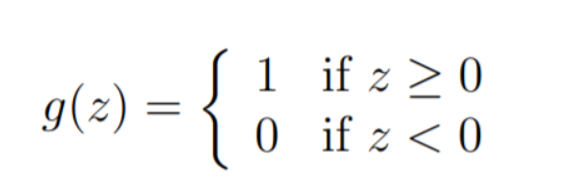

- Unlike Logistic Regression which outputs probability between 0 and 1, the Perceptron outputs values that are either 0 or 1 exactly.
- This function says that if the output(theta.X) is greater than or equal to zero, then the model will classify 1(red for example)and if the output is less than zero, the model will classify as 0(green for example). And that is how the perception algorithm classifies.


In [3]:
#coding the step function:
def step_func(z):
        return 1.0 if (z > 0) else 0.0

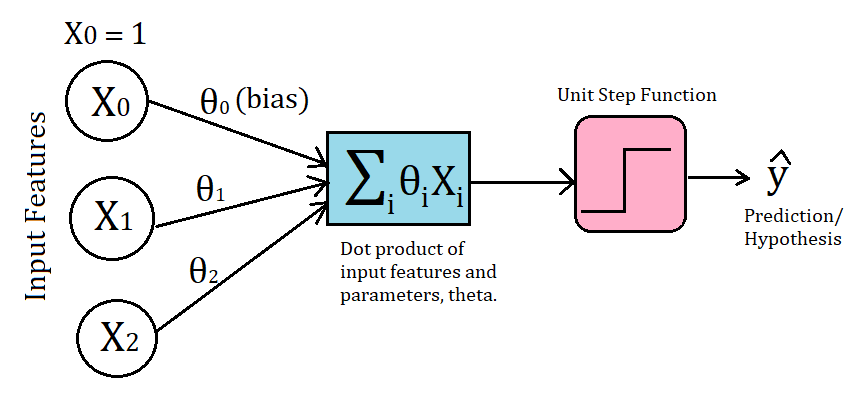

- For every training example, we first take the dot product of input features and parameters, theta. Then, we apply the Unit Step Function to make the prediction(y_hat).
- If the prediction is wrong or in other words the model has misclassified that example, we make the update for the parameters theta. We don’t update when the prediction is correct (or the same as the true/target value y).

Perceptron update Rule
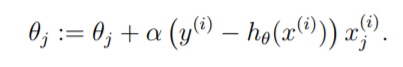

In [4]:
def perceptron(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

In [16]:
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Perceptron Algorithm")
    plt.plot(x1, x2, 'y-')